# Road identification via Semantic Segmentation
This repository demonstrates the basic use of Net trained on the Cityscapes dataset. This model is used to segment the pixel region that belongs to the road, then the exact edge is calculated with the information provided by the gradient of the segmented region.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading the model and defining the necessary parameters:

In [2]:
# read neural ENET configuration
model = cv2.dnn.readNet('enet-model.net')

# normalization factor
norm_factor = 1 / 255.0

# binarization factor
b_factor = 1.1

Loading the test image:

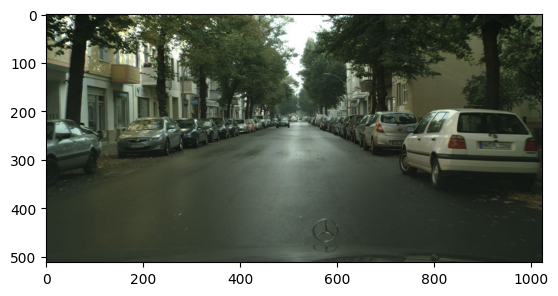

In [3]:
img = cv2.imread('test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

We make a prediction with ENet and identify the pixels belonging to the road class, (class 1, as indicated in file [enet-classses.txt](enet-classses.txt)):

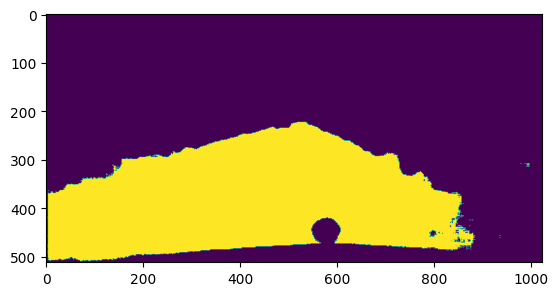

In [4]:
# image preprocessing
proc_img = cv2.dnn.blobFromImage(image=img, scalefactor=norm_factor, size=[img.shape[1], img.shape[0]], mean=0, swapRB=True, crop=False)

# model evaluation
model.setInput(proc_img)
eval = model.forward()[0]

# pixels class prediction
inds = np.argmax(eval, axis=0)

# road binarization
road_bin = inds==1
road_bin = np.array(road_bin, dtype=np.float32)

plt.imshow(road_bin)

Road border detection by gradient information:

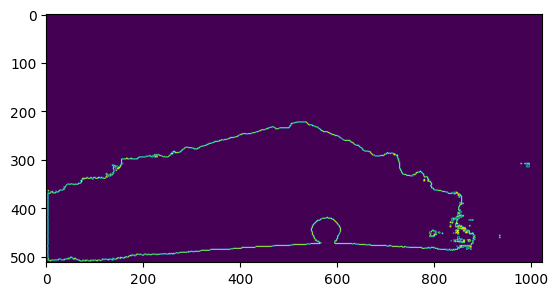

In [5]:
gx, gy = np.gradient(road_bin)
edge = gy * gy + gx * gx # gradient magnitud
edge[edge != 0.0] = 255.0 # elements with gradient different from 0
edge = np.array(edge, dtype=np.float32)

plt.imshow(edge)

Marking of edges and road region in the original image:

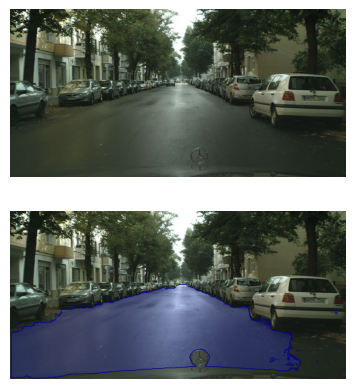

In [6]:
# plots
fig, axs = plt.subplots(2,1)

# original image
axs[0].imshow(img)
axs[0].axis('off')


# final image
db = 50 # segmentation intensity
out = img.copy()
for ri in range(img.shape[0]):
    for ci in range(img.shape[1]):
        # edges
        if edge[ri,ci] > 0:
            out[ri,ci]=[0,0,120]
        
        # road
        if road_bin[ri,ci] > 0:
            if img[ri,ci,2] + db >255:
                out[ri,ci,2] = 255
            else:
                out[ri,ci,2] += db
axs[1].imshow(out)
axs[1].axis('off')

# edge
plt.show()
fig.savefig('output.png', bbox_inches ="tight", dpi=300)